In [21]:
from mlxtend.plotting import scatterplotmatrix

In [2]:
import pandas as pd
import numpy as np

train = pd.read_csv('/content/drive/MyDrive/gh/kaggle/dacon/bicycle/dataset/train.csv')
test = pd.read_csv('/content/drive/MyDrive/gh/kaggle/dacon/bicycle/dataset/test.csv')
sample_submission = pd.read_csv('/content/drive/MyDrive/gh/kaggle/dacon/bicycle/dataset/sample_submission.csv')
train.head()

,date_time,wind_direction,sky_condition,precipitation_form,wind_speed,humidity,low_temp,high_temp,Precipitation_Probability,number_of_rentals
0,2018-04-01,207.500,4.000,0.000,3.050,75.000,12.600,21.000,30.000,22994
1,2018-04-02,208.317,2.950,0.000,3.278,69.833,12.812,19.000,19.500,28139
2,2018-04-03,213.516,2.911,0.000,2.690,74.879,10.312,15.316,19.113,26817
3,2018-04-04,143.836,3.692,0.425,3.138,71.849,8.312,12.368,43.493,26034
4,2018-04-05,95.905,4.000,0.723,3.186,73.784,5.875,10.421,63.378,2833


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273 entries, 0 to 272
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   date_time                  273 non-null    object 
 1   wind_direction             273 non-null    float64
 2   sky_condition              273 non-null    float64
 3   precipitation_form         273 non-null    float64
 4   wind_speed                 273 non-null    float64
 5   humidity                   273 non-null    float64
 6   low_temp                   273 non-null    float64
 7   high_temp                  273 non-null    float64
 8   Precipitation_Probability  273 non-null    float64
 9   number_of_rentals          273 non-null    int64  
dtypes: float64(8), int64(1), object(1)
memory usage: 21.5+ KB


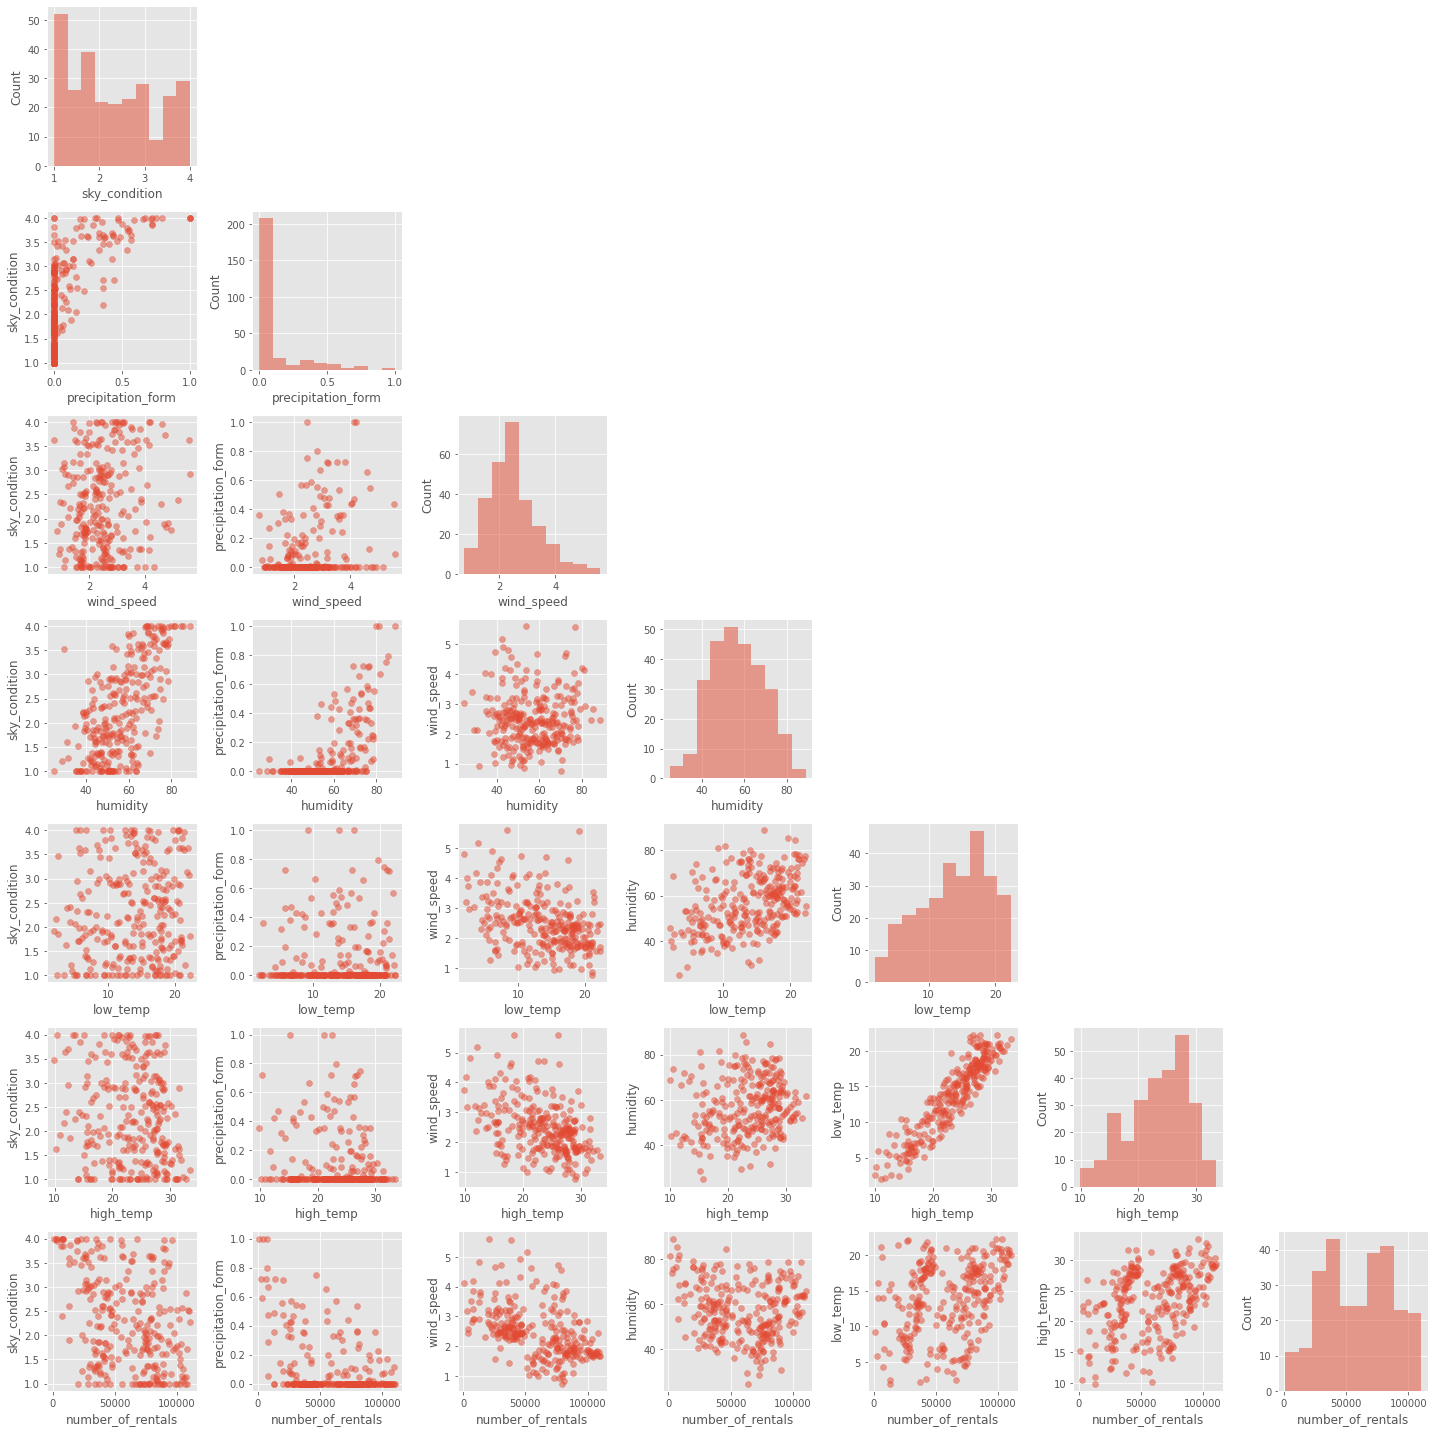

In [24]:
cols = ['sky_condition',
       'precipitation_form',
       'wind_speed',
       'humidity',
       'low_temp',
       'high_temp',
       'number_of_rentals']

scatterplotmatrix(train[cols].values, figsize=(20,20),names=cols,alpha=0.5)
plt.tight_layout()
plt.show()

In [ ]:
# weekend 토요일 일요일이 아니고 날씨도 좋았지만 대여량이 낮은날.
# discomfort index
# sensible temperature


In [4]:
bicycle = train

In [5]:
def check_missing_col(dataframe):
    counted_missing_col = 0
    for i, col in enumerate(bicycle.columns):
        missing_values = sum(bicycle[col].isna())
        is_missing = True if missing_values >= 1 else False
        if is_missing:
            counted_missing_col += 1
            print(f'결측치가 있는 컬럼은: {col}입니다')
            print(f'총 {missing_values}개의 결측치가 존재합니다.')

        if i == len(bicycle.columns) - 1 and counted_missing_col == 0:
            print('결측치가 존재하지 않습니다')

check_missing_col(bicycle)

결측치가 존재하지 않습니다


In [15]:
def seperate_datetime(dataframe):
    year = []
    month = []
    day = []

    for date in dataframe.date_time:
        year_point, month_point, day_point = date.split('-') # - 기준으로 string을 나누고 list로 만듦 ex) '2016-04-01' -> ['2016', '04', '01']
        year.append(int(year_point))
        month.append(int(month_point))
        day.append(int(day_point))
    return year, month, day

year, month, day = seperate_datetime(bicycle)
    
bicycle['year'] = year
bicycle['month'] = month
bicycle['day'] = day

bicycle.head()

,date_time,wind_direction,sky_condition,precipitation_form,wind_speed,humidity,low_temp,high_temp,Precipitation_Probability,number_of_rentals,year,month,day
0,2018-04-01,207.500,4.000,0.000,3.050,75.000,12.600,21.000,30.000,22994,2018,4,1
1,2018-04-02,208.317,2.950,0.000,3.278,69.833,12.812,19.000,19.500,28139,2018,4,2
2,2018-04-03,213.516,2.911,0.000,2.690,74.879,10.312,15.316,19.113,26817,2018,4,3
3,2018-04-04,143.836,3.692,0.425,3.138,71.849,8.312,12.368,43.493,26034,2018,4,4
4,2018-04-05,95.905,4.000,0.723,3.186,73.784,5.875,10.421,63.378,2833,2018,4,5


In [25]:
X = bicycle.drop(['date_time','wind_direction','Precipitation_Probability', 'number_of_rentals'], axis=1)
y = bicycle.number_of_rentals

In [17]:
## base line
# from sklearn.linear_model import LinearRegression

# model = LinearRegression() # 모델 정의
# model.fit(X, y) # 학습
# y_hat = model.predict(X) # y 예측
# nmae = np.mean(abs(y_hat - y) / y) # nmae 계산

# print(f'모델 NMAE: {nmae}')




LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [26]:
# random forest
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(n_estimators=1000,
                               criterion='mse',
                               random_state=1,
                               n_jobs=-1)

forest.fit(X,y)
y_hat = forest.predict(X)

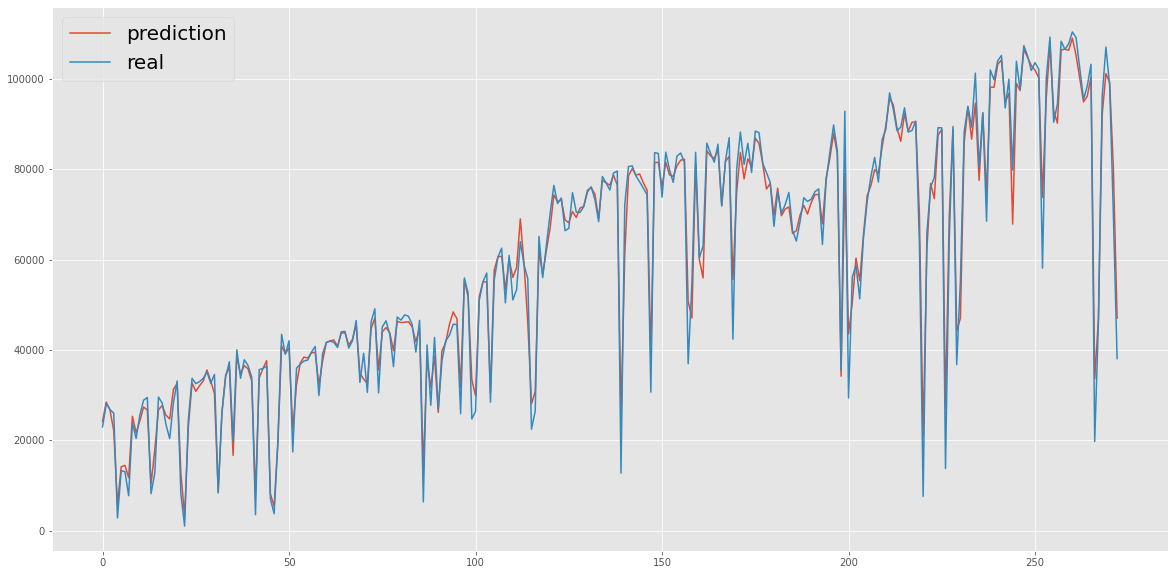

In [27]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')
plt.figure(figsize=(20, 10))
plt.plot(y_hat, label = 'prediction')
plt.plot(y, label = 'real')
plt.legend(fontsize = 20)
plt.show()

In [28]:
check_missing_col(test) # 결측치 확인

year, month, day = seperate_datetime(test) #날짜 숫자로 분리 후 

#새로운 컬럼을 생성
test['year'] = year 
test['month'] = month
test['day'] = day

test.head()

결측치가 존재하지 않습니다


,date_time,wind_direction,sky_condition,precipitation_form,wind_speed,humidity,low_temp,high_temp,Precipitation_Probability,year,month,day
0,2021-04-01,108.833,3.000,0.000,2.900,28.333,11.800,20.667,18.333,2021,4,1
1,2021-04-02,116.717,3.850,0.000,2.662,46.417,12.000,19.000,28.500,2021,4,2
2,2021-04-03,82.669,4.000,0.565,2.165,77.258,8.875,16.368,52.847,2021,4,3
3,2021-04-04,44.123,3.466,0.466,3.747,63.288,6.250,17.368,37.671,2021,4,4
4,2021-04-05,147.791,1.500,0.000,1.560,48.176,7.188,18.684,4.459,2021,4,5


In [14]:
# # baseline
# # 문자열인 date_time 컬럼 drop
# test_X = test.drop('date_time','wind_direction','Precipitation_Probability' axis = 1)

# # train data로 학습시킨 모델에 test_X데이터를 넣고 예측
# test_yhat = model.predict(test_X)

# # submission dataFrame 완성
# sample_submission['number_of_rentals'] = test_yhat

# # 제출 파일 생성
# sample_submission.to_csv('/content/drive/MyDrive/gh/kaggle/dacon/bicycle/dataset/base_line.csv', index= False)

In [31]:
# rf
# 문자열인 date_time 컬럼 drop
test_X = test.drop(['date_time','wind_direction','Precipitation_Probability'], axis = 1)

# train data로 학습시킨 모델에 test_X데이터를 넣고 예측
test_yhat = forest.predict(test_X)

# submission dataFrame 완성
sample_submission['number_of_rentals'] = test_yhat

# 제출 파일 생성
sample_submission.to_csv('/content/drive/MyDrive/gh/kaggle/dacon/bicycle/dataset/rf.csv', index= False)

In [ ]:
# 1.다중회귀 앙상블
# 2.randomserch cv 적용
# 3.아래 계산해서 칼럼 추가
# weekend 토요일 일요일이 아니고 날씨도 좋았지만 대여량이 낮은날.
# discomfort index
# sensible temperature